In [276]:
# Filtering out the warnings
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
tweets = pd.read_csv('tweets.csv')
tweets.head()

,created_at,rounded_time,text
0,01/31/2023-00:26:52,01/31/2023-00:00,chroniclove69 onlyfans leaks (13 photos)\n\nTi...
1,01/31/2023-00:30:53,01/31/2023-01:00,RT @RollbitRewards: $250 #Giveaway ðð\n\...
2,01/31/2023-00:31:53,01/31/2023-01:00,RT @Ashcryptoreal: Bitcoin needs to close abov...
3,01/31/2023-00:32:23,01/31/2023-01:00,RT @MacnBTC: You won't make lifechanging money...
4,01/31/2023-00:35:54,01/31/2023-01:00,ðNew Verified Airdropâ \n(65% Legit Airdro...


In [278]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

In [279]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def contx_to_exp(text):
  for key in apostrophe_dict:
    value = apostrophe_dict[key]
    text = text.replace(key, value)
    return text

In [280]:
# Emotion detection by different symbols
emotion_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

def emotion_check(text):
  for key in emotion_dict:
    value = emotion_dict[key]
    text = text.replace(key, value)
    return text

In [281]:
def clean_text(text):
  text = re.sub(r'https?:\/\/\S*'," ", text) # Removing the url from the text
  text = re.sub(r'@\S+', " ", text) # Removing twitter handles from the text
  text = re.sub('#'," ", text) # removing # from the data
  text = re.sub(r'RT', "", text) # Removing the Re-tweet mark
  text = re.sub(r"\s+"," ", text)  # Removing Extra Spaces
  text = text.lower()
  return text

#removes pattern in the input text
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt.lower()

In [282]:
#removing the twitter handles @user
tweets['clean_tweet'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")

#using above functions
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : clean_text(x))
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : contx_to_exp(x))
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : emotion_check(x))

#removing special characters, numbers and punctuations
tweets['clean_tweet'] = tweets['clean_tweet'].str.replace("[^a-zA-Z]", " ")


#remove short words
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

# Removing every thing other than text
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r'[^\w\s]',' ',x))  # Replacing Punctuations with space
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r'[^a-zA-Z]', ' ', x)) # Raplacing all the things with space other than text
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r"\s+"," ", x)) # Removing extra spaces


#individual words as tokens
tokenized_tweet = tweets['clean_tweet'].apply(lambda x: x.split())


#stem the words

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [lemmatizer.lemmatize(stemmer.stem(word)) for word in sentence])



#combine words into single sentence 
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    

    
tweets['clean_tweet'] = tokenized_tweet
tweets.head()

,created_at,rounded_time,text,clean_tweet
0,01/31/2023-00:26:52,01/31/2023-00:00,chroniclove69 onlyfans leaks (13 photos)\n\nTi...,chroniclov onlyfan leak photo tip lw l reueyxr...
1,01/31/2023-00:30:53,01/31/2023-01:00,RT @RollbitRewards: $250 #Giveaway ðð\n\...,giveaway friend follow winner day rollbit rewa...
2,01/31/2023-00:31:53,01/31/2023-01:00,RT @Ashcryptoreal: Bitcoin needs to close abov...,bitcoin need close abov then program
3,01/31/2023-00:32:23,01/31/2023-01:00,RT @MacnBTC: You won't make lifechanging money...,won t make lifechang money btc eth anymor leas...
4,01/31/2023-00:35:54,01/31/2023-01:00,ðNew Verified Airdropâ \n(65% Legit Airdro...,new verifi airdrop legit airdrop orbeon protoc...


In [283]:
from textblob import TextBlob     # for performing NLP Functions
polarity=[]     #list that contains polarity of tweets
subjectivity=[]    ##list that contains subjectivity of tweets

for i in tweets.text.values:
    try:
        analysis = TextBlob(i) # [i] records to the first data in dataset
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)
        

        
# adding sentiment score in csv

tweets['sentiment_score'] = polarity
tweets.head()

,created_at,rounded_time,text,clean_tweet,sentiment_score
0,01/31/2023-00:26:52,01/31/2023-00:00,chroniclove69 onlyfans leaks (13 photos)\n\nTi...,chroniclov onlyfan leak photo tip lw l reueyxr...,0.00
1,01/31/2023-00:30:53,01/31/2023-01:00,RT @RollbitRewards: $250 #Giveaway ðð\n\...,giveaway friend follow winner day rollbit rewa...,0.00
2,01/31/2023-00:31:53,01/31/2023-01:00,RT @Ashcryptoreal: Bitcoin needs to close abov...,bitcoin need close abov then program,0.00
3,01/31/2023-00:32:23,01/31/2023-01:00,RT @MacnBTC: You won't make lifechanging money...,won t make lifechang money btc eth anymor leas...,-0.35
4,01/31/2023-00:35:54,01/31/2023-01:00,ðNew Verified Airdropâ \n(65% Legit Airdro...,new verifi airdrop legit airdrop orbeon protoc...,0.10


In [284]:
tweets.to_csv('Cleaned tweets with sentiments.csv', index=False)

In [285]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
#df = pd.read_csv('Cleaned tweets with sentiments.csv.csv')

# Define the sentiment analysis function
def get_vader_sentiment(text):
    if isinstance(text, str):  # Check if the input is a string
        scores = analyzer.polarity_scores(text)
        return scores['compound']
    else:
        return 0.0  # Return neutral sentiment score for non-string inputs

# Apply sentiment analysis to the 'clean_tweet' column
# Convert non-string values to NaN, then fill with an empty string or drop
tweets['clean_tweet'] = tweets['clean_tweet'].fillna('').astype(str)

# Apply the sentiment analysis function
tweets['sentiment_score'] = tweets['clean_tweet'].apply(get_vader_sentiment)

# Classify the sentiment as positive, neutral, or negative
def classify_vader_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
        

tweets['sentiment'] = tweets['sentiment_score'].apply(classify_vader_sentiment)

# Classify the sentiment as positive, neutral, or negative
tweets['sentiment'] = tweets['sentiment_score'].apply(classify_vader_sentiment)

# Save the DataFrame with the sentiment scores and classifications
tweets.to_csv('tweets_with_vader_sentiment.csv', index=False)

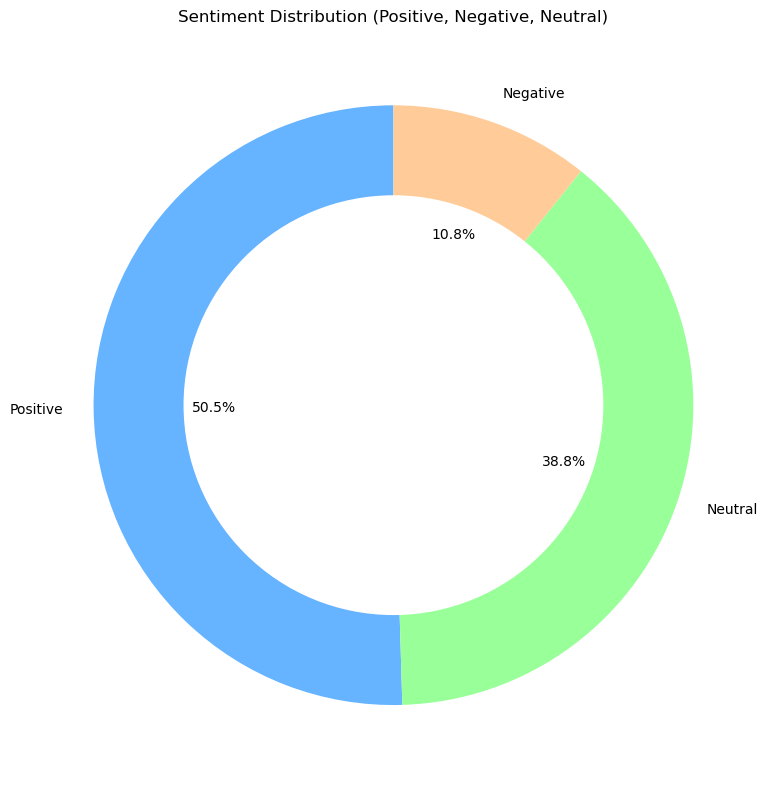

In [286]:
import matplotlib.pyplot as plt

# Load the dataset
#textblob_df = pd.read_csv('tweets_with_vader_sentiment.csv')

# Count the sentiment categories
sentiment_counts = tweets['sentiment'].value_counts()

# Create a doughnut plot
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
center_circle = plt.Circle((0,0), 0.70, fc='white')  # Create a doughnut effect
plt.gca().add_artist(center_circle)

# Add a title
plt.title('Sentiment Distribution (Positive, Negative, Neutral)')
plt.tight_layout()
plt.show()

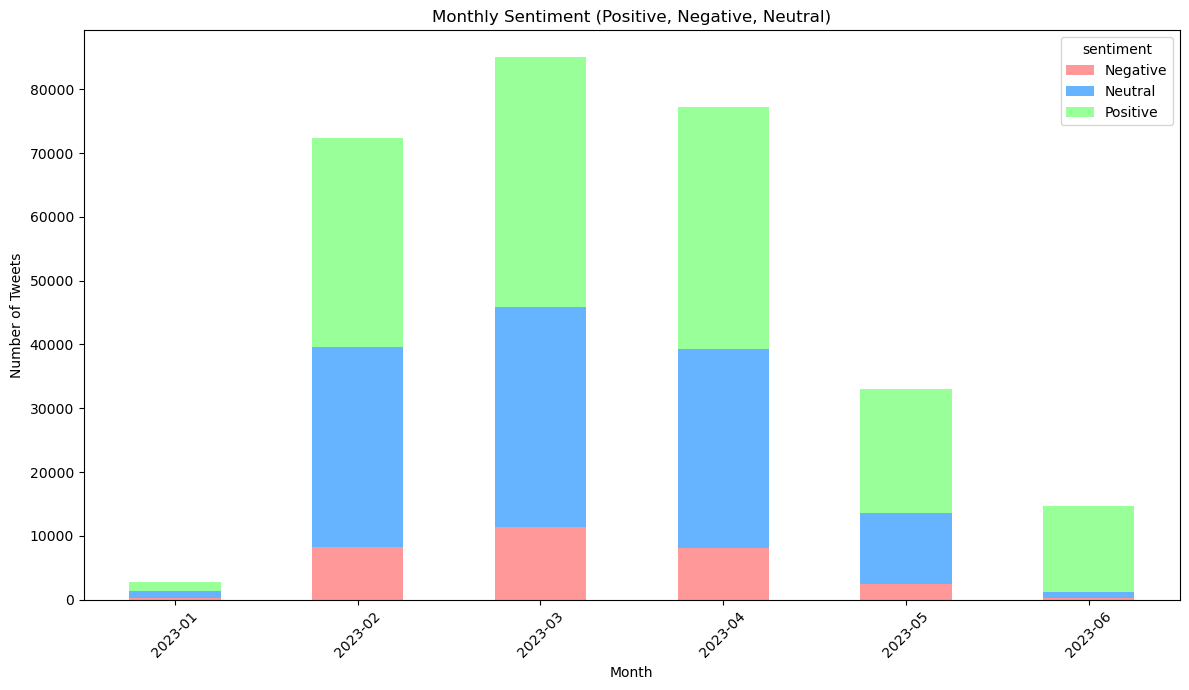

In [287]:

# Load the dataset
textblob_df = tweets
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y-%H:%M')
    except ValueError:
        # Handle other possible formats if needed
        raise ValueError(f"Unrecognized date format: {date_str}")


textblob_df['rounded_time'] = textblob_df['rounded_time'].apply(parse_date)

# Convert the date column to datetime
textblob_df['rounded_time'] = pd.to_datetime(textblob_df['rounded_time'], format='%d/%m/%Y')

# Group by month and sentiment category
monthly_sentiment = textblob_df.groupby([textblob_df['rounded_time'].dt.to_period('M'), 'sentiment']).size().unstack()

# Plot the bar chart
monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Monthly Sentiment (Positive, Negative, Neutral)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [288]:
import yfinance as yf
btc_data = yf.download("BTC-USD", start="2023-01-31", end="2023-06-22", interval='1h')
btc_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,,
2023-01-31 00:00:00+00:00,22857.765625,22857.765625,22864.251953,22765.568359,22840.796875,0
2023-01-31 01:00:00+00:00,22858.328125,22858.328125,22870.337891,22797.083984,22855.978516,0
2023-01-31 02:00:00+00:00,22893.318359,22893.318359,22909.501953,22847.179688,22855.148438,0
2023-01-31 03:00:00+00:00,22861.804688,22861.804688,22890.263672,22858.869141,22890.263672,0
2023-01-31 04:00:00+00:00,22862.117188,22862.117188,22874.230469,22831.378906,22859.744141,0
...,...,...,...,...,...,...
2023-06-21 19:00:00+00:00,30140.515625,30140.515625,30163.027344,29934.535156,30129.257812,0
2023-06-21 20:00:00+00:00,29953.015625,29953.015625,30132.429688,29877.929688,30132.429688,0


In [289]:
btc_data.to_csv('price.csv', index=False)

In [290]:
btc_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,,
2023-01-31 00:00:00+00:00,22857.765625,22857.765625,22864.251953,22765.568359,22840.796875,0
2023-01-31 01:00:00+00:00,22858.328125,22858.328125,22870.337891,22797.083984,22855.978516,0
2023-01-31 02:00:00+00:00,22893.318359,22893.318359,22909.501953,22847.179688,22855.148438,0
2023-01-31 03:00:00+00:00,22861.804688,22861.804688,22890.263672,22858.869141,22890.263672,0
2023-01-31 04:00:00+00:00,22862.117188,22862.117188,22874.230469,22831.378906,22859.744141,0
...,...,...,...,...,...,...
2023-06-21 19:00:00+00:00,30140.515625,30140.515625,30163.027344,29934.535156,30129.257812,0
2023-06-21 20:00:00+00:00,29953.015625,29953.015625,30132.429688,29877.929688,30132.429688,0


In [291]:
btc_data.index

DatetimeIndex(['2023-01-31 00:00:00+00:00', '2023-01-31 01:00:00+00:00',
               '2023-01-31 02:00:00+00:00', '2023-01-31 03:00:00+00:00',
               '2023-01-31 04:00:00+00:00', '2023-01-31 05:00:00+00:00',
               '2023-01-31 06:00:00+00:00', '2023-01-31 07:00:00+00:00',
               '2023-01-31 08:00:00+00:00', '2023-01-31 09:00:00+00:00',
               ...
               '2023-06-21 14:00:00+00:00', '2023-06-21 15:00:00+00:00',
               '2023-06-21 16:00:00+00:00', '2023-06-21 17:00:00+00:00',
               '2023-06-21 18:00:00+00:00', '2023-06-21 19:00:00+00:00',
               '2023-06-21 20:00:00+00:00', '2023-06-21 21:00:00+00:00',
               '2023-06-21 22:00:00+00:00', '2023-06-21 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=3325, freq=None)

In [292]:
df = pd.read_csv('btc_hourly_data1.csv')
print(df.head())

           Datetime    Adj Close        Close         High          Low  \
0  01/31/2023-00:00  22857.76563  22857.76563  22864.25195  22765.56836   
1  01/31/2023-01:00  22858.32813  22858.32813  22870.33789  22797.08398   
2  01/31/2023-02:00  22893.31836  22893.31836  22909.50195  22847.17969   
3  01/31/2023-03:00  22861.80469  22861.80469  22890.26367  22858.86914   
4  01/31/2023-04:00  22862.11719  22862.11719  22874.23047  22831.37891   

          Open  Volume  
0  22840.79688       0  
1  22855.97852       0  
2  22855.14844       0  
3  22890.26367       0  
4  22859.74414       0  


In [293]:
df.rename(columns={'Datetime': 'rounded_time'}, inplace=True)
df

,rounded_time,Adj Close,Close,High,Low,Open,Volume
0,01/31/2023-00:00,22857.76563,22857.76563,22864.25195,22765.56836,22840.79688,0
1,01/31/2023-01:00,22858.32813,22858.32813,22870.33789,22797.08398,22855.97852,0
2,01/31/2023-02:00,22893.31836,22893.31836,22909.50195,22847.17969,22855.14844,0
3,01/31/2023-03:00,22861.80469,22861.80469,22890.26367,22858.86914,22890.26367,0
4,01/31/2023-04:00,22862.11719,22862.11719,22874.23047,22831.37891,22859.74414,0
...,...,...,...,...,...,...,...
3512,06/29/2023-19:00,30596.47070,30596.47070,30596.47070,30490.56055,30563.76758,0
3513,06/29/2023-20:00,30404.14844,30404.14844,30632.92578,30273.21680,30595.83008,415524864
3514,06/29/2023-21:00,30416.70313,30416.70313,30442.90234,30369.32227,30406.34961,0
3515,06/29/2023-22:00,30408.71875,30408.71875,30453.70508,30408.71875,30412.48047,0


In [294]:
# Load the TextBlob and VADER sentiment datasets
textblob_df = pd.read_csv('Cleaned tweets with sentiments.csv')
vader_df = pd.read_csv('tweets_with_vader_sentiment.csv')
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y-%H:%M')
    except ValueError:
        return pd.to_datetime(date_str, format='%m/%d/%Y-%H:%M')

textblob_df['rounded_time'] = textblob_df['rounded_time'].apply(parse_date)
vader_df['rounded_time'] = vader_df['rounded_time'].apply(parse_date)

# Ensure the 'date' column is in datetime format for proper plotting, with a specified format
textblob_df['rounded_time'] = pd.to_datetime(textblob_df['rounded_time'], format='%m/%d/%Y-%H:%M')
vader_df['rounded_time'] = pd.to_datetime(vader_df['rounded_time'], format='%m/%d/%Y-%H:%M')

# Aggregate sentiment scores by date (average sentiment per day)
textblob_daily = textblob_df.groupby('rounded_time')['sentiment_score'].mean().reset_index()
vader_daily = vader_df.groupby('rounded_time')['sentiment_score'].mean().reset_index()

# Ensure the 'Date' column in the Bitcoin dataset is in datetime format
df['rounded_time'] = pd.to_datetime(df['rounded_time'], format='%m/%d/%Y-%H:%M')

# Merge TextBlob, VADER, and Bitcoin data on 'date'
merged_data = pd.merge(textblob_daily, vader_daily, on='rounded_time', how='inner', suffixes=('_textblob', '_vader'))
merged_data = pd.merge(merged_data, df, left_on='rounded_time', right_on='rounded_time', how='inner')


# Show the first few rows of merged data
print(merged_data.head())

         rounded_time  sentiment_score_textblob  sentiment_score_vader  \
0 2023-01-31 00:00:00                  0.142336               0.165558   
1 2023-01-31 01:00:00                  0.129171               0.178608   
2 2023-01-31 02:00:00                  0.164494               0.186917   
3 2023-01-31 03:00:00                  0.094387               0.158187   
4 2023-01-31 04:00:00                  0.106855               0.235430   

     Adj Close        Close         High          Low         Open  Volume  
0  22857.76563  22857.76563  22864.25195  22765.56836  22840.79688       0  
1  22858.32813  22858.32813  22870.33789  22797.08398  22855.97852       0  
2  22893.31836  22893.31836  22909.50195  22847.17969  22855.14844       0  
3  22861.80469  22861.80469  22890.26367  22858.86914  22890.26367       0  
4  22862.11719  22862.11719  22874.23047  22831.37891  22859.74414       0  


In [295]:
price_indicator = [merged_data.Close[0] - merged_data['Open'][0]]
for i in range(len(merged_data)-1):
    price_indicator.append(merged_data.Close[i+1] - merged_data.Close[i])
price_indicator

[16.96875,
 0.5625,
 34.99022999999943,
 -31.513670000000275,
 0.3125,
 -50.62696000000142,
 24.529300000001967,
 128.63280999999915,
 -59.859370000001945,
 11.574220000002242,
 -55.51563000000169,
 35.41797000000224,
 27.544920000000275,
 170.03125,
 56.449219999998604,
 -16.63086000000112,
 -9.146479999999428,
 31.34375,
 28.667969999998604,
 -11.72070999999778,
 -56.546870000001945,
 -176.92187999999805,
 249.31836000000112,
 -49.294920000000275,
 -43.93555000000197,
 38.458989999999176,
 -19.224609999997483,
 9.978520000000572,
 16.601559999999154,
 -12.966800000001967,
 -56.96875,
 20.029300000001967,
 -101.39648999999918,
 23.884769999996934,
 3.1699200000002747,
 58.482420000000275,
 -1.9413999999997031,
 31.11522999999943,
 11.859380000001693,
 -111.32227000000057,
 -18.43359000000055,
 14.660149999999703,
 96.26563000000169,
 298.2402299999994,
 147.46875,
 150.53515999999945,
 19.673829999999725,
 8.160149999999703,
 436.875,
 -176.56835999999748,
 -71.52734000000055,
 -25.68

In [296]:
merged_data['price_indicator'] = 0
for i in range(len(price_indicator)):
    merged_data['price_indicator'][i] = price_indicator[i]
    
merged_data.head()

,rounded_time,sentiment_score_textblob,sentiment_score_vader,Adj Close,Close,High,Low,Open,Volume,price_indicator
0,2023-01-31 00:00:00,0.142336,0.165558,22857.76563,22857.76563,22864.25195,22765.56836,22840.79688,0,16.96875
1,2023-01-31 01:00:00,0.129171,0.178608,22858.32813,22858.32813,22870.33789,22797.08398,22855.97852,0,0.56250
2,2023-01-31 02:00:00,0.164494,0.186917,22893.31836,22893.31836,22909.50195,22847.17969,22855.14844,0,34.99023
3,2023-01-31 03:00:00,0.094387,0.158187,22861.80469,22861.80469,22890.26367,22858.86914,22890.26367,0,-31.51367
4,2023-01-31 04:00:00,0.106855,0.235430,22862.11719,22862.11719,22874.23047,22831.37891,22859.74414,0,0.31250


In [297]:
merged_data.to_csv('price indicator with sentiments1.csv', index=False)

In [298]:
# Filtering out the warnings
import warnings

warnings.filterwarnings('ignore')
merged_data['target'] = 0
for i in range(len(merged_data)-1):
    if merged_data.price_indicator[i] > 0:
        merged_data['target'][i] = 1 
        
# 0 - price down
# 1 - price up

merged_data.head()

,rounded_time,sentiment_score_textblob,sentiment_score_vader,Adj Close,Close,High,Low,Open,Volume,price_indicator,target
0,2023-01-31 00:00:00,0.142336,0.165558,22857.76563,22857.76563,22864.25195,22765.56836,22840.79688,0,16.96875,1
1,2023-01-31 01:00:00,0.129171,0.178608,22858.32813,22858.32813,22870.33789,22797.08398,22855.97852,0,0.56250,1
2,2023-01-31 02:00:00,0.164494,0.186917,22893.31836,22893.31836,22909.50195,22847.17969,22855.14844,0,34.99023,1
3,2023-01-31 03:00:00,0.094387,0.158187,22861.80469,22861.80469,22890.26367,22858.86914,22890.26367,0,-31.51367,0
4,2023-01-31 04:00:00,0.106855,0.235430,22862.11719,22862.11719,22874.23047,22831.37891,22859.74414,0,0.31250,1


In [299]:
merged_data.to_csv('Target price indicator.csv', index=False)

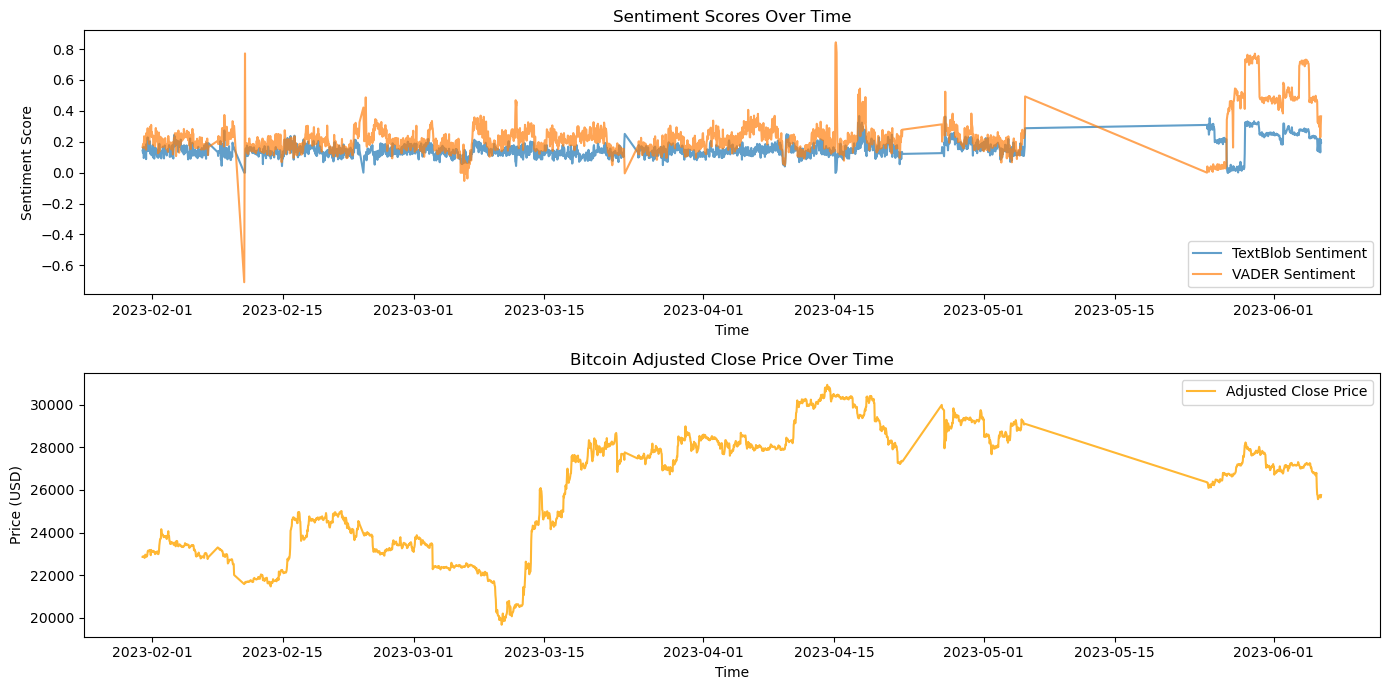

In [300]:
import matplotlib.pyplot as plt

# Plot sentiment scores and Adjusted Close prices over time
plt.figure(figsize=(14, 7))

# Sentiment Scores
plt.subplot(2, 1, 1)
plt.plot(merged_data['rounded_time'], merged_data['sentiment_score_textblob'], label='TextBlob Sentiment', alpha=0.7)
plt.plot(merged_data['rounded_time'], merged_data['sentiment_score_vader'], label='VADER Sentiment', alpha=0.7)
plt.title('Sentiment Scores Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.legend()

# Bitcoin Prices
plt.subplot(2, 1, 2)
plt.plot(merged_data['rounded_time'], merged_data['Adj Close'], label='Adjusted Close Price', color='orange', alpha=0.8)
plt.title('Bitcoin Adjusted Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()

plt.tight_layout()
plt.show()


In [301]:
#Create a list of columns to keep in the completed data set and show the data.

keep_columns = ['Open','High','Low','Close','sentiment_score_textblob','sentiment_score_vader','target']
df = merged_data[keep_columns]
df.head()

,Open,High,Low,Close,sentiment_score_textblob,sentiment_score_vader,target
0,22840.79688,22864.25195,22765.56836,22857.76563,0.142336,0.165558,1
1,22855.97852,22870.33789,22797.08398,22858.32813,0.129171,0.178608,1
2,22855.14844,22909.50195,22847.17969,22893.31836,0.164494,0.186917,1
3,22890.26367,22890.26367,22858.86914,22861.80469,0.094387,0.158187,0
4,22859.74414,22874.23047,22831.37891,22862.11719,0.106855,0.235430,1


In [302]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   rounded_time              2366 non-null   datetime64[ns]
 1   sentiment_score_textblob  2366 non-null   float64       
 2   sentiment_score_vader     2366 non-null   float64       
 3   Adj Close                 2366 non-null   float64       
 4   Close                     2366 non-null   float64       
 5   High                      2366 non-null   float64       
 6   Low                       2366 non-null   float64       
 7   Open                      2366 non-null   float64       
 8   Volume                    2366 non-null   int64         
 9   price_indicator           2366 non-null   float64       
 10  target                    2366 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 203.5 KB


In [303]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


features = ['sentiment_score_textblob', 'sentiment_score_vader', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
X = merged_data[features]
y = merged_data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Baseline model: Random Forest Classifier
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = baseline_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Displaying the metrics in a readable format
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(report)



Accuracy: 0.70

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       352
           1       0.72      0.67      0.69       358

    accuracy                           0.70       710
   macro avg       0.70      0.70      0.70       710
weighted avg       0.70      0.70      0.70       710



In [304]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Perform the search
random_search.fit(X_train, y_train)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params, best_score


Fitting 3 folds for each of 50 candidates, totalling 150 fits


({'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'log2',
  'max_depth': None,
  'bootstrap': True},
 0.6618357487922706)

In [305]:
#Applying Hill climbing method for Random forest algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Initial parameters
n_estimators = 200  # Starting value
max_depth = 10
best_accuracy = 0
max_iterations = 20  # Number of iterations
iterations = 0

while iterations < max_iterations:
    # Train the random forest with the current hyperparameters
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=420)
    model.fit(X_train, y_train)

    # Validate the model
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred)

    # Check if the current parameters yield better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
    else:
        # Randomly modify the hyperparameters
        n_estimators += np.random.choice([-10, 10])  # Add or subtract 10 trees
        max_depth += np.random.choice([-2, 2])  # Increase or decrease depth

    iterations += 1
    print(f"Iteration {iterations}: n_estimators={n_estimators}, max_depth={max_depth}, Accuracy={best_accuracy:.4f}")

print(f"\nBest Parameters: n_estimators={n_estimators}, max_depth={max_depth}, Best Accuracy={best_accuracy:.4f}")


Iteration 1: n_estimators=200, max_depth=10, Accuracy=0.6803
Iteration 2: n_estimators=210, max_depth=8, Accuracy=0.6803
Iteration 3: n_estimators=200, max_depth=6, Accuracy=0.6803
Iteration 4: n_estimators=210, max_depth=8, Accuracy=0.6803
Iteration 5: n_estimators=200, max_depth=10, Accuracy=0.6803
Iteration 6: n_estimators=190, max_depth=12, Accuracy=0.6803
Iteration 7: n_estimators=180, max_depth=14, Accuracy=0.6803
Iteration 8: n_estimators=180, max_depth=14, Accuracy=0.7028
Iteration 9: n_estimators=170, max_depth=12, Accuracy=0.7028
Iteration 10: n_estimators=160, max_depth=10, Accuracy=0.7028
Iteration 11: n_estimators=150, max_depth=8, Accuracy=0.7028
Iteration 12: n_estimators=160, max_depth=10, Accuracy=0.7028
Iteration 13: n_estimators=170, max_depth=8, Accuracy=0.7028
Iteration 14: n_estimators=160, max_depth=10, Accuracy=0.7028
Iteration 15: n_estimators=150, max_depth=8, Accuracy=0.7028
Iteration 16: n_estimators=140, max_depth=6, Accuracy=0.7028
Iteration 17: n_estimato

In [306]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y) for regression
X_reg = merged_data[features]
y_reg = merged_data['target']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = rf_regressor.predict(X_test_reg)

# Evaluate regression metrics
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

mae, mse, r2


(0.390830985915493, 0.18196971830985914, 0.27209802334531563)

In [307]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the LDA model
lda_cv_scores = cross_val_score(lda_model, X, y, cv=5, scoring='accuracy')

# Mean and standard deviation of cross-validation accuracy
lda_cv_mean = lda_cv_scores.mean()
lda_cv_std = lda_cv_scores.std()

lda_cv_mean, lda_cv_std


(0.9382842258320622, 0.035472358152946436)

In [308]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y) for regression
X_reg = merged_data[features]
y_reg = merged_data['target']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Train SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_svr = svr_model.predict(X_test_reg)

# Evaluate regression metrics
mae_svr = mean_absolute_error(y_test_reg, y_pred_svr)
mse_svr = mean_squared_error(y_test_reg, y_pred_svr)
r2_svr = r2_score(y_test_reg, y_pred_svr)

mae_svr, mse_svr, r2_svr


(0.489317453292266, 0.365049772622163, -0.4602454382907002)

In [310]:
#Model with LAG Feature

In [324]:
btc_data1 = pd.read_csv('btc_hourly_data1.csv')
tweets_data1 = pd.read_csv('tweets_with_vader_sentiment.csv')
btc_data1.head(), tweets_data1.head()

(           Datetime    Adj Close        Close         High          Low  \
 0  01/31/2023-00:00  22857.76563  22857.76563  22864.25195  22765.56836   
 1  01/31/2023-01:00  22858.32813  22858.32813  22870.33789  22797.08398   
 2  01/31/2023-02:00  22893.31836  22893.31836  22909.50195  22847.17969   
 3  01/31/2023-03:00  22861.80469  22861.80469  22890.26367  22858.86914   
 4  01/31/2023-04:00  22862.11719  22862.11719  22874.23047  22831.37891   
 
           Open  Volume  
 0  22840.79688       0  
 1  22855.97852       0  
 2  22855.14844       0  
 3  22890.26367       0  
 4  22859.74414       0  ,
             created_at      rounded_time  \
 0  01/31/2023-00:26:52  01/31/2023-00:00   
 1  01/31/2023-00:30:53  01/31/2023-01:00   
 2  01/31/2023-00:31:53  01/31/2023-01:00   
 3  01/31/2023-00:32:23  01/31/2023-01:00   
 4  01/31/2023-00:35:54  01/31/2023-01:00   
 
                                                 text  \
 0  chroniclove69 onlyfans leaks (13 photos)\n\nTi...   

In [325]:
# Convert Datetime columns to a uniform datetime format for merging
btc_data1['Datetime'] = pd.to_datetime(btc_data1['Datetime'], format='%m/%d/%Y-%H:%M')
tweets_data1['rounded_time'] = pd.to_datetime(tweets_data1['rounded_time'], format='%m/%d/%Y-%H:%M')

# Aggregate sentiment scores by hour
tweets_agg = tweets_data1.groupby('rounded_time').agg(
    avg_sentiment_score=('sentiment_score', 'mean'),
    sentiment_positive=('sentiment', lambda x: (x == 'Positive').sum()),
    sentiment_negative=('sentiment', lambda x: (x == 'Negative').sum()),
    total_tweets=('sentiment', 'count')
).reset_index()

# Merge the Bitcoin and sentiment datasets
btc_data_merged = btc_data1.merge(tweets_agg, left_on='Datetime', right_on='rounded_time', how='left')

# Drop the redundant 'rounded_time' column
btc_data_merged = btc_data_merged.drop(columns=['rounded_time'])

# Display the merged dataset's structure
btc_data_merged.head()


,Datetime,Adj Close,Close,High,Low,Open,Volume,avg_sentiment_score,sentiment_positive,sentiment_negative,total_tweets
0,2023-01-31 00:00:00,22857.76563,22857.76563,22864.25195,22765.56836,22840.79688,0,0.165558,7.0,0.0,12.0
1,2023-01-31 01:00:00,22858.32813,22858.32813,22870.33789,22797.08398,22855.97852,0,0.178608,49.0,15.0,119.0
2,2023-01-31 02:00:00,22893.31836,22893.31836,22909.50195,22847.17969,22855.14844,0,0.186917,54.0,16.0,120.0
3,2023-01-31 03:00:00,22861.80469,22861.80469,22890.26367,22858.86914,22890.26367,0,0.158187,59.0,13.0,120.0
4,2023-01-31 04:00:00,22862.11719,22862.11719,22874.23047,22831.37891,22859.74414,0,0.235430,64.0,11.0,119.0


In [326]:
# Create lagged sentiment features
for lag in range(1, 4):  # Lagging by 1, 2, and 3 hours
    btc_data_merged[f'avg_sentiment_score_lag{lag}'] = btc_data_merged['avg_sentiment_score'].shift(lag)
    btc_data_merged[f'sentiment_positive_lag{lag}'] = btc_data_merged['sentiment_positive'].shift(lag)
    btc_data_merged[f'sentiment_negative_lag{lag}'] = btc_data_merged['sentiment_negative'].shift(lag)

# Correlation of lagged sentiment features with 'Adj Close'
lagged_columns = [col for col in btc_data_merged.columns if 'lag' in col]
correlation_with_price = btc_data_merged[['Adj Close'] + lagged_columns].corr()['Adj Close'].iloc[1:]




In [327]:
#Define the target and features
target = 'Adj Close'
features = ['avg_sentiment_score', 'sentiment_positive', 'sentiment_negative', 'total_tweets'] + lagged_columns
data = btc_data_merged.dropna(subset=features + [target])
#features and target variables
X = data[features]
y = data[target]
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(2057.41014556652, 2460.1015402252683)

In [328]:
#After adding technical indicators Simple moving average / RSI

In [331]:
import ta

In [332]:
# Add technical indicators to the dataset
btc_data_merged['SMA_10'] = btc_data_merged['Adj Close'].rolling(window=10).mean() #10 hours
btc_data_merged['SMA_30'] = btc_data_merged['Adj Close'].rolling(window=30).mean()  # 30-hour
btc_data_merged['Volatility'] = btc_data_merged['Adj Close'].rolling(window=10).std()  # Rolling standard deviation (10-hour)
btc_data_merged['RSI'] = ta.momentum.RSIIndicator(btc_data_merged['Adj Close'], window=14).rsi()  # Relative Strength Index

In [333]:
btc_data_merged.head()

,Datetime,Adj Close,Close,High,Low,Open,Volume,avg_sentiment_score,sentiment_positive,sentiment_negative,...,avg_sentiment_score_lag2,sentiment_positive_lag2,sentiment_negative_lag2,avg_sentiment_score_lag3,sentiment_positive_lag3,sentiment_negative_lag3,SMA_10,SMA_30,Volatility,RSI
0,2023-01-31 00:00:00,22857.76563,22857.76563,22864.25195,22765.56836,22840.79688,0,0.165558,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-31 01:00:00,22858.32813,22858.32813,22870.33789,22797.08398,22855.97852,0,0.178608,49.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-31 02:00:00,22893.31836,22893.31836,22909.50195,22847.17969,22855.14844,0,0.186917,54.0,16.0,...,0.165558,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-31 03:00:00,22861.80469,22861.80469,22890.26367,22858.86914,22890.26367,0,0.158187,59.0,13.0,...,0.178608,49.0,15.0,0.165558,7.0,0.0,NaN,NaN,NaN,NaN
4,2023-01-31 04:00:00,22862.11719,22862.11719,22874.23047,22831.37891,22859.74414,0,0.235430,64.0,11.0,...,0.186917,54.0,16.0,0.178608,49.0,15.0,NaN,NaN,NaN,NaN


In [4]:
btc_data_with_indicators = btc_data_merged.dropna(subset=features + ['SMA_10', 'SMA_30', 'Volatility', 'RSI'] + [target])

NameError: name 'btc_data_merged' is not defined

In [335]:
features_with_indicators = features + ['SMA_10', 'SMA_30', 'Volatility', 'RSI']

In [3]:
X1 = btc_data_with_indicators[features_with_indicators]
y1 = btc_data_with_indicators[target]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, shuffle=False)
model_with_indicators = RandomForestRegressor(n_estimators=100, random_state=42)
model_with_indicators.fit(X_train, y_train)
y_pred_with_indicators = model_with_indicators.predict(X_test)
mae_with_indicators = mean_absolute_error(y_test, y_pred_with_indicators)
rmse_with_indicators = np.sqrt(mean_squared_error(y_test, y_pred_with_indicators))

mae_with_indicators, rmse_with_indicators

NameError: name 'btc_data_with_indicators' is not defined

In [2]:
# Correcting the x-axis to use actual datetime values
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.plot(btc_data_with_indicators['Datetime'][-len(y_test):], y_test, label='Actual Prices', alpha=0.7)
plt.plot(btc_data_with_indicators['Datetime'][-len(y_test):], y_pred_with_indicators, label='Predicted Prices', alpha=0.7)
plt.title('Actual vs. Predicted Bitcoin Prices (Without Technical Indicators)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
#This graph show high variability within the price range

NameError: name 'btc_data_with_indicators' is not defined

<Figure size 1400x800 with 0 Axes>

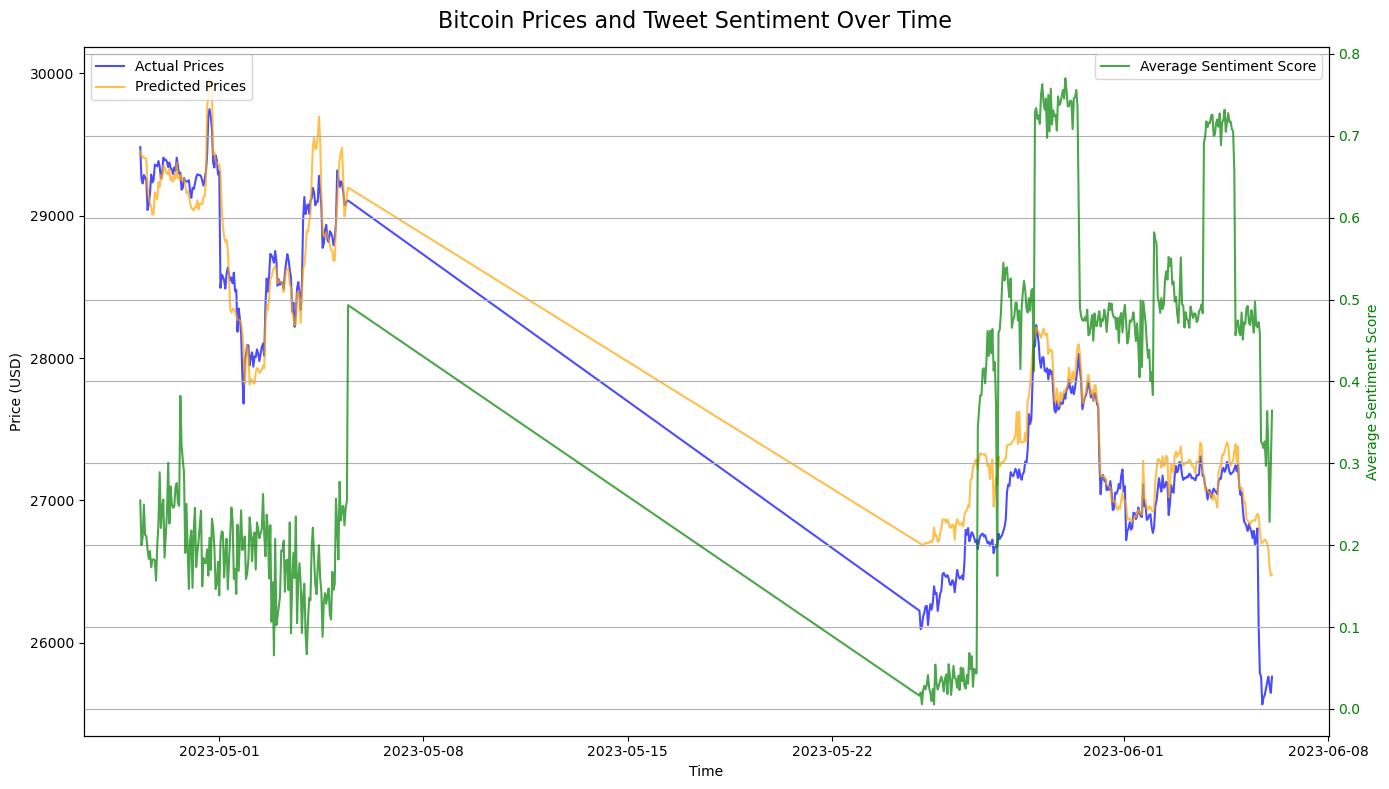

In [339]:
# sentiment data to match the same date range as the test set
sentiment_data = btc_data_with_indicators[['Datetime', 'avg_sentiment_score']].iloc[-len(y_test):]

# Plot actual prices, predicted prices, and average sentiment score
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot actual and predicted prices
ax1.plot(btc_data_with_indicators['Datetime'][-len(y_test):], y_test, label='Actual Prices', alpha=0.7, color='blue')
ax1.plot(btc_data_with_indicators['Datetime'][-len(y_test):], y_pred_with_indicators, label='Predicted Prices', alpha=0.7, color='orange')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (USD)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

#  y-axis for sentiment scores
ax2 = ax1.twinx()
ax2.plot(sentiment_data['Datetime'], sentiment_data['avg_sentiment_score'], label='Average Sentiment Score', alpha=0.7, color='green')
ax2.set_ylabel('Average Sentiment Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.suptitle('Bitcoin Prices and Tweet Sentiment Over Time', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
